In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.calibration import CalibratedClassifierCV

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# pipline_svc_cv = Pipeline(steps=[('search', GridSearchCV(estimator=LinearSVC(),
#                                                       param_grid=[{'C':np.logspace(-1, 1, 10)}],
#                                                       cv=10, verbose=True))])
# pipline_svc_cv.fit(X_train, y_train)
# best_c = pipline_svc_cv.named_steps.search.best_params_['C']
best_c = 1

pipline_svc = Pipeline(steps=[('search', LinearSVC(C=best_c))])
pipline_svc.fit(X_train, y_train)

y_pred_svc = pipline_svc.predict(X_test)
print(roc_auc_score(y_test, y_pred_svc))
svc_disp = plot_roc_curve(pipline_svc, X_test, y_test)
plt.show()
# 0.7742552265602115
# 0.85

svc_disp = plot_precision_recall_curve(pipline_svc, X_test, y_test)
plt.show()
# 0.83

pipline_lr_cv = Pipeline(steps=[('search', GridSearchCV(estimator=LogisticRegression(),
                                                      param_grid=[{'C':np.logspace(-2, 2, 20)}],
                                                      cv=10))])
pipline_lr_cv.fit(X_train, y_train)
best_с = pipline_lr_cv.named_steps.search.best_params_['C']
best_с

pipline_lr = Pipeline(steps=[('search', LogisticRegression(C=best_c))])
pipline_lr.fit(X_train, y_train)

y_pred_lr = pipline_lr.predict(X_test)
print(roc_auc_score(y_test, y_pred_lr))
svc_disp = plot_roc_curve(pipline_lr, X_test, y_test)
plt.show()

svc_disp = plot_precision_recall_curve(pipline_lr, X_test, y_test)
plt.show()

pipline_svc_linkern = Pipeline(steps=[('search', SVC(kernel='linear', C=0.0263))])
pipline_svc_linkern.fit(X_train, y_train)

y_pred_svc_linkern = pipline_svc_linkern.predict(X_test)
print(roc_auc_score(y_test, y_pred_svc_linkern))
svc_disp_svc_linkern = plot_roc_curve(pipline_svc_linkern, X_test, y_test)
plt.show()

svc_disp_svc_linkern = plot_precision_recall_curve(pipline_svc_linkern, X_test, y_test)
plt.show()

In [15]:
X, y = make_classification(
    n_samples=10000, n_features=2, n_informative=2, n_redundant=0,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [57]:
pipline_2_svc = Pipeline(steps=[
         ('calibrator', 
          CalibratedClassifierCV(
              base_estimator=SVC(C=0.1, kernel='linear', probability=True),
              method='isotonic'))])
pipline_2_svc.fit(X_train, y_train)
predict_2_svc = pipline_2_svc.predict_proba(X_test)

In [17]:
w_x = pipline_2_svc.named_steps.svc.coef_[0]
w_y = pipline_2_svc.named_steps.svc.coef_[0]
b = pipline_2_svc.named_steps.svc.intercept_
x = [-5, 3]
y = - (w_x * x + b) / w_y

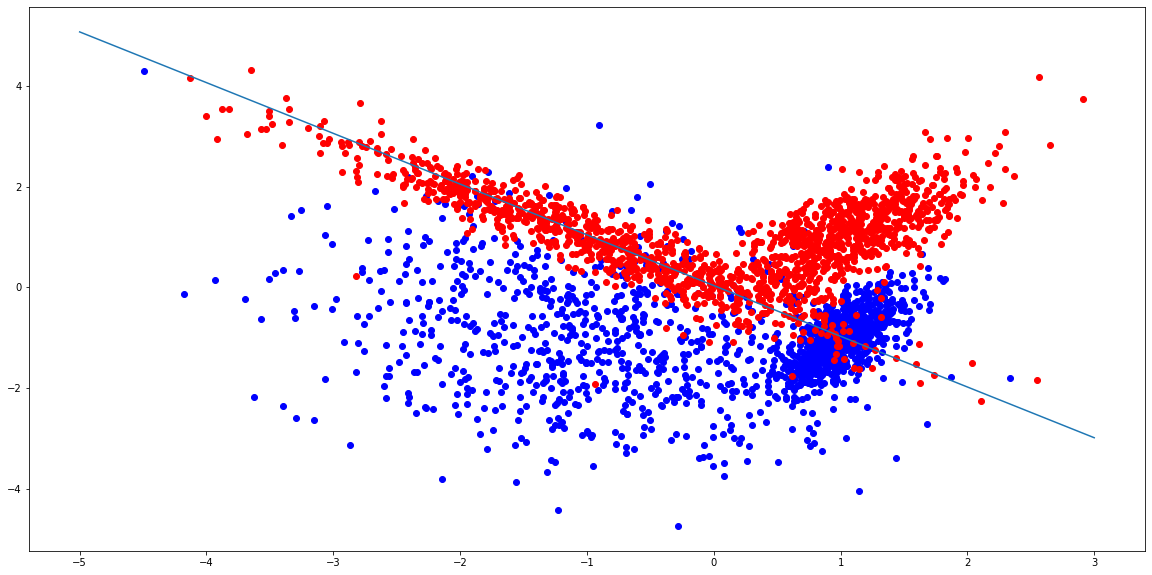

In [18]:
fig = plt.figure(figsize=(20,10))
data_test = pd.DataFrame ({'feat_1': X_test[:, 0], 
                           'feat_2': X_test[:, 1], 
                           'class': y_test})
plt.scatter(data_test.loc[data_test['class'] == 0, ['feat_1']], 
            data_test.loc[data_test['class'] == 0, ['feat_2']], color='blue')
plt.scatter(data_test.loc[data_test['class'] == 1, ['feat_1']], 
            data_test.loc[data_test['class'] == 1, ['feat_2']], color='red')

# plt.scatter(pipline_2_svc.named_steps.svc.support_vectors_[:, 0], 
#             pipline_2_svc.named_steps.svc.support_vectors_[:, 1], color='green')

plt.plot(x, y)

pipline_2_svc.named_steps.svc.support_vectors_
plt.show(fig)

0.8870000853339403


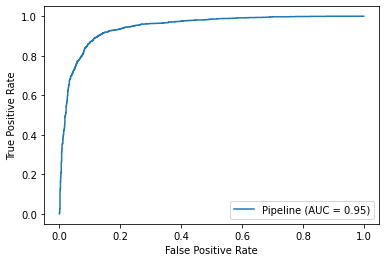

In [19]:
print(roc_auc_score(y_test, predict_2_svc))
svc_disp = plot_roc_curve(pipline_2_svc, X_test, y_test)
plt.show()

In [24]:
pipline_2_lr = Pipeline(steps=[('svc', LogisticRegression(C=1))])
pipline_2_lr.fit(X_train, y_train)
predict_2_lr = pipline_2_lr.predict_proba(X_test)

In [25]:
x = np.linspace(-5, 3, 100)
y = np.linspace(-4, 4, 100)

z = []
for i in x:
    zi = []
    for j in y:
        zi.append(pipline_2_lr.predict_proba([[i, j]])[0][0])
    z.append(zi)

z = np.asarray(z)    
z[:-1, :-1]

x_mg, y_mg = np.meshgrid(x, y, indexing='ij')


<ipython-input-22-9ff6d3b6ba4c>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_mg, y_mg, z, cmap='ocean')


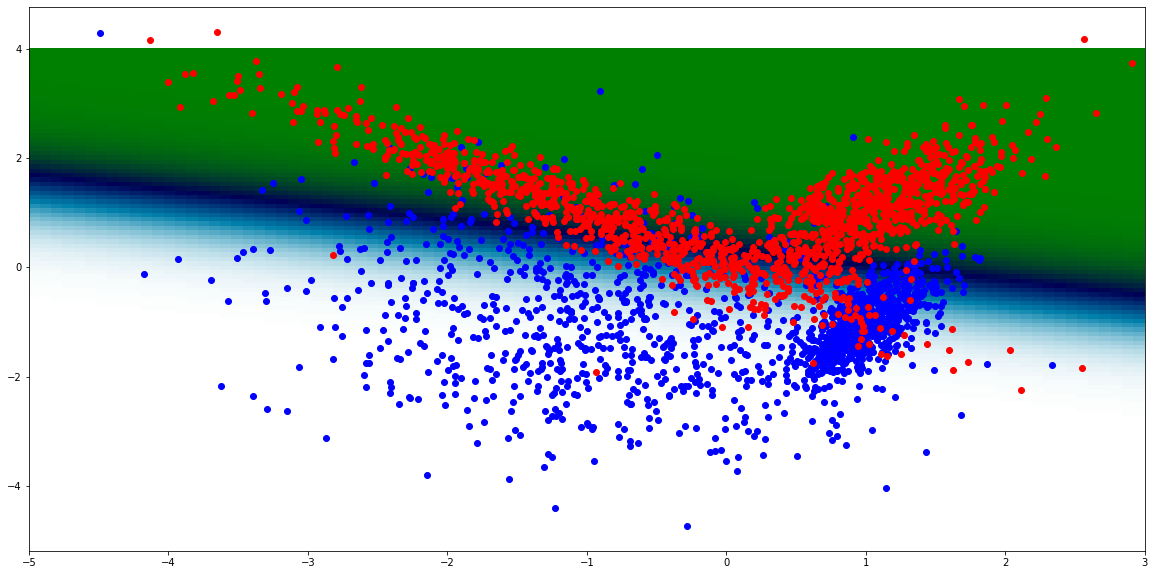

In [22]:
fig = plt.figure(figsize=(20,10))

plt.pcolor(x_mg, y_mg, z, cmap='ocean')

plt.scatter(data_test.loc[data_test['class'] == 0, ['feat_1']], 
            data_test.loc[data_test['class'] == 0, ['feat_2']], color='blue')
plt.scatter(data_test.loc[data_test['class'] == 1, ['feat_1']], 
            data_test.loc[data_test['class'] == 1, ['feat_2']], color='red')
# plt.scatter(pipline_2_svc.named_steps.svc.support_vectors_[:, 0], 
#             pipline_2_svc.named_steps.svc.support_vectors_[:, 1], color='green')

plt.show(fig)

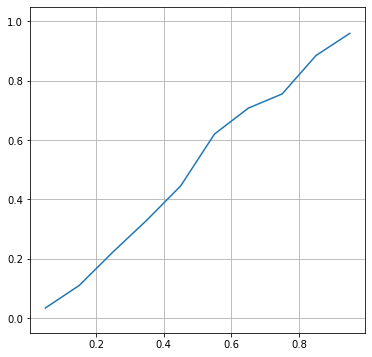

In [47]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = (1.0 / n_bins) * i
        r = (1.0 / n_bins) * (i + 1)
        bin_middle_points.append((l + r) / 2) 
        bin_real_ratios.append(np.sum(y_test[(preds >= l) & (preds < r)] == 1) 
                               / y_test[(preds >= l) & (preds < r)].shape[0]) 
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()
    
plot_calibration_curve(y_test, predict_2_lr[:, 1])

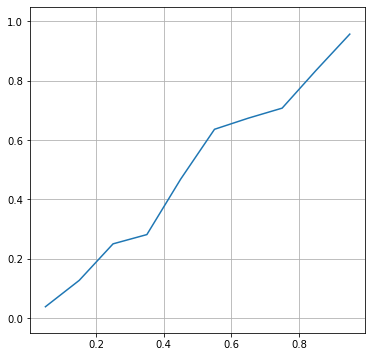

In [59]:
plot_calibration_curve(y_test, predict_2_svc[:, 1])